## **Import all needed packages**

In [169]:
import os
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files
from scipy.stats import ks_2samp
from matplotlib import pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# **Load the Data**

- Load the CSV file using Panda's `pd.read_csv()`.
- Inspect the data using `df.head()` to show the first 10 rows of the data set.





In [170]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
file_path = '/content/drive/My Drive/student-data.csv'
df = pd.read_csv(file_path)

# Display part of the dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **Display the data types**

Show the data types with `df.dtypes.`

In [171]:
# Check for the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                     

# **Data summary**

Full summary of the dataset using `df.info().`

In [172]:
# Data set full summary
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualifi

In [173]:
# Data summary
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [174]:
#check if there are missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# **Correlation Map**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


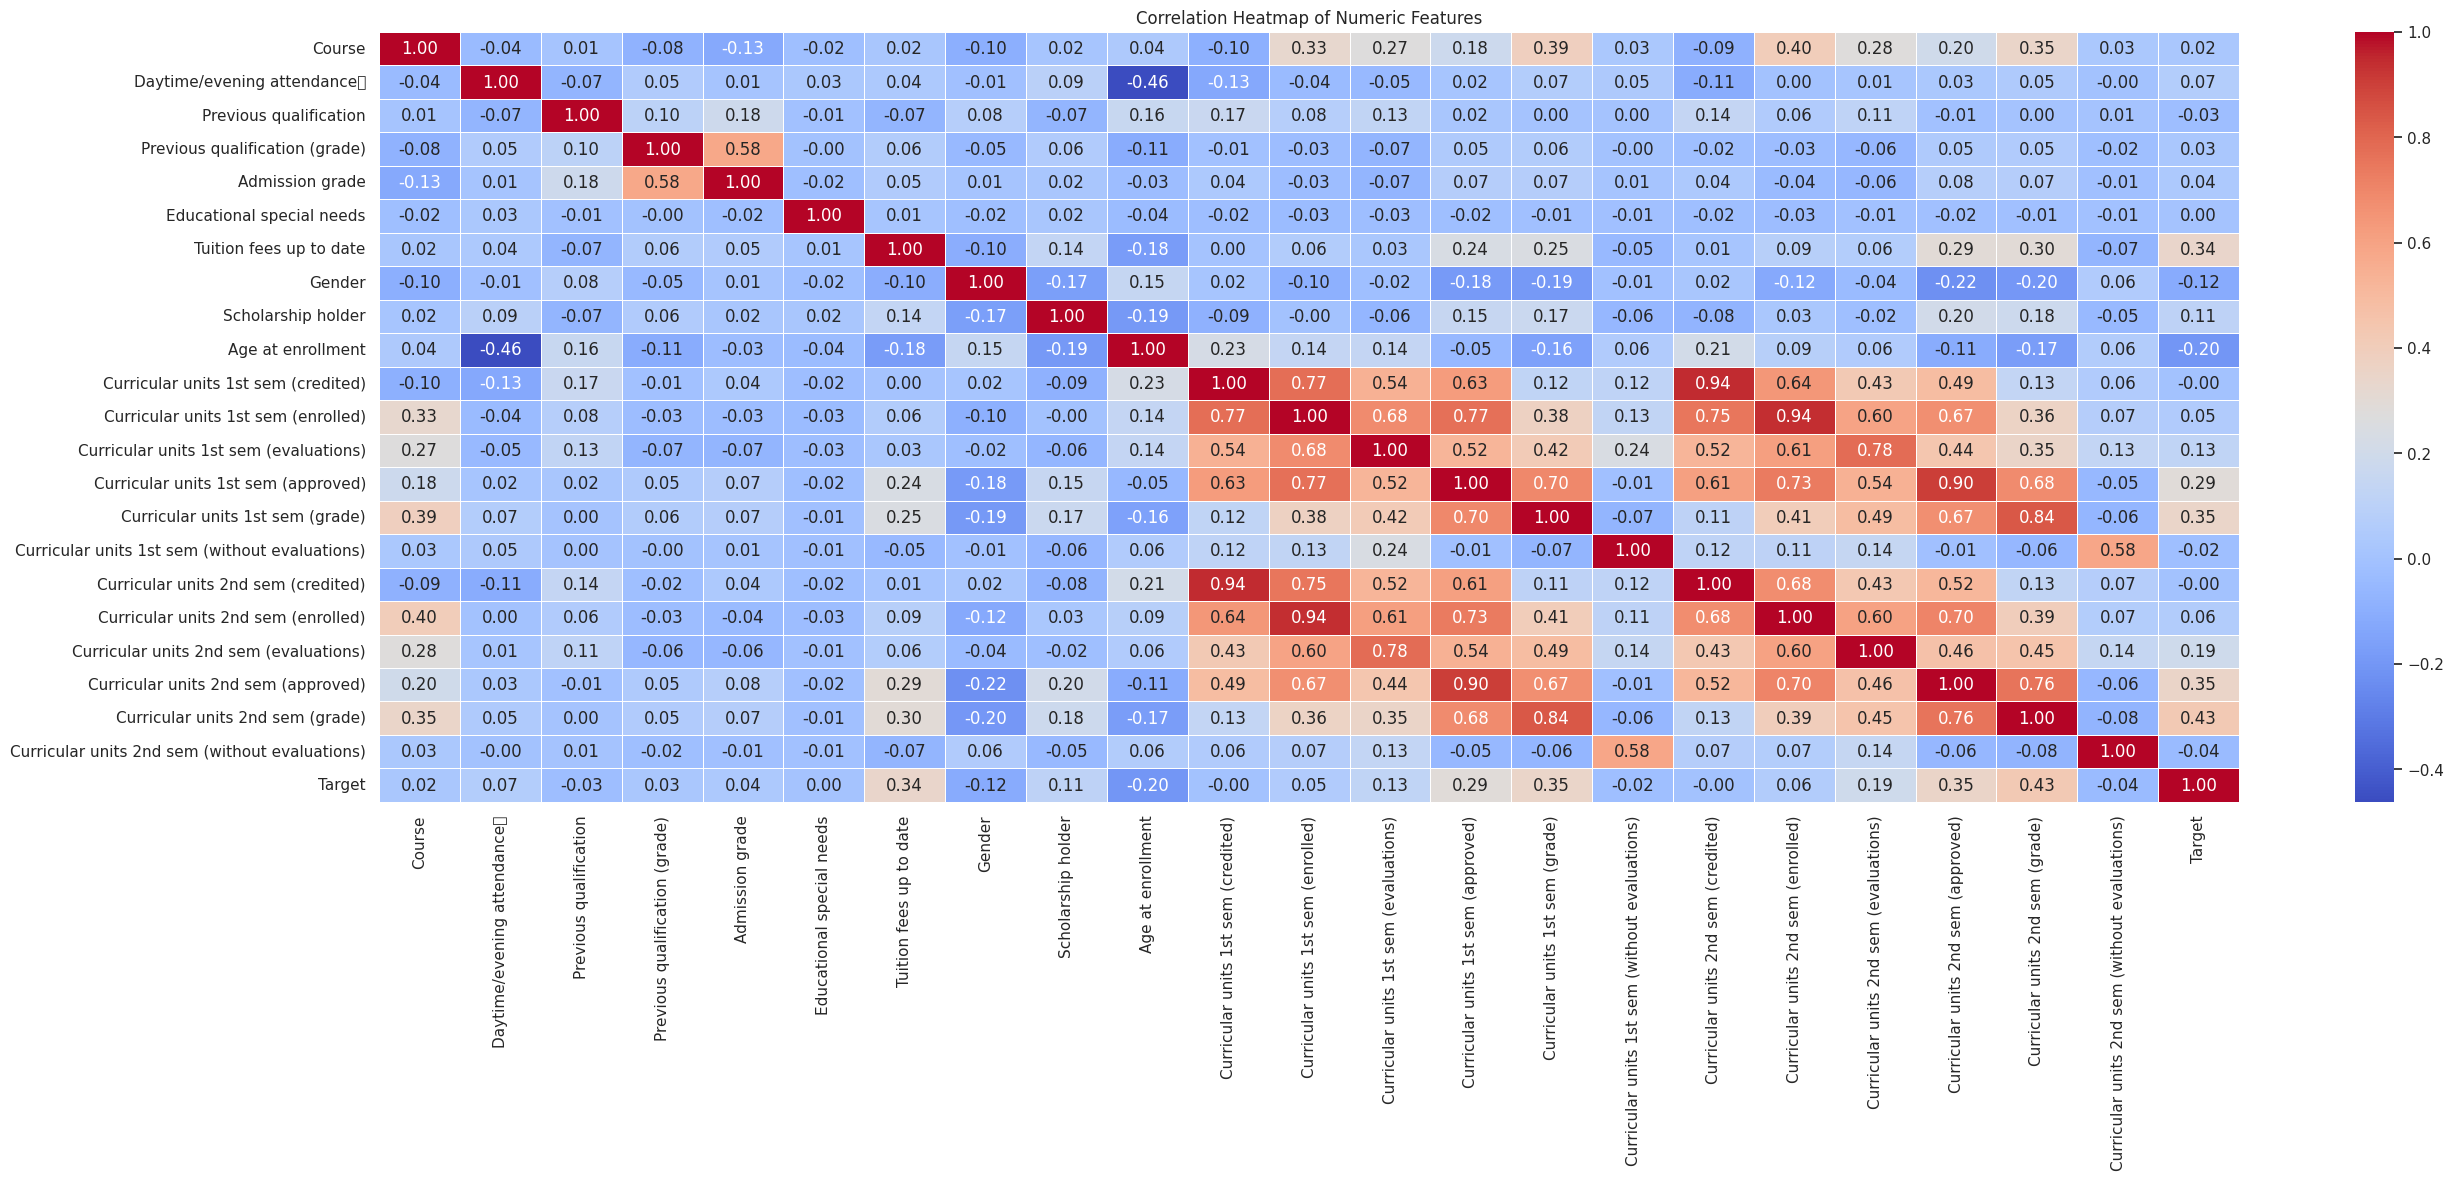

In [277]:
# Visualize the heatmap for features and target correlations
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# **Understanding the `Target`**

In [176]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [177]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

# **1- Data Cleaning and Preprocessing**

## **A- Checking for null values**

In [178]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [179]:
# check the new information to see if there is any missing values
df.isnull().sum()

# a description of the dataset
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## **B- Rounding all the float values present inside the dataset into its nearest number**

In [180]:
df = df.round()

In [181]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,11.0,1.0,2.0,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,14.0,0,14.0,-0.0,1.0,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,11.0,1.0,2.0,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.0,0,9.0,-1.0,-3.0,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,14.0,-0.0,1.0,Graduate


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## **C- Converting all the floating values to integer**

In [183]:
df[['Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']] = df[['Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']].astype(np.int64)

In [184]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,11,1,2,Dropout
1,1,15,1,9254,1,1,160,1,1,3,...,0,6,6,6,14,0,14,0,1,Graduate
2,1,1,5,9070,1,1,122,1,37,37,...,0,6,0,0,0,0,11,1,2,Dropout
3,1,17,2,9773,1,1,122,1,38,37,...,0,6,10,5,12,0,9,-1,-3,Graduate
4,2,39,1,8014,0,1,100,1,37,38,...,0,6,6,6,13,0,14,0,1,Graduate


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   int64 
 1   Application mode                                4424 non-null   int64 
 2   Application order                               4424 non-null   int64 
 3   Course                                          4424 non-null   int64 
 4   Daytime/evening attendance	                     4424 non-null   int64 
 5   Previous qualification                          4424 non-null   int64 
 6   Previous qualification (grade)                  4424 non-null   int64 
 7   Nacionality                                     4424 non-null   int64 
 8   Mother's qualification                          4424 non-null   int64 
 9   Father's qualification                          4424

## **D- Dropping all unneeded columns**

In [186]:
df = df.drop(columns=['Application mode', 'Application order', 'International', 'Debtor', 'Marital status', 'Displaced', 'Nacionality', 'Father\'s qualification', 'Mother\'s qualification', 'Father\'s occupation', 'Father\'s qualification', 'Mother\'s occupation', 'Mother\'s qualification', 'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

In [187]:
df.head()

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,171,1,1,122,127,0,1,1,0,20,...,0,0,0,0,0,0,0,0,0,Dropout
1,9254,1,1,160,142,0,0,1,0,19,...,6,14,0,0,6,6,6,14,0,Graduate
2,9070,1,1,122,125,0,0,1,0,19,...,0,0,0,0,6,0,0,0,0,Dropout
3,9773,1,1,122,120,0,1,0,0,20,...,6,13,0,0,6,10,5,12,0,Graduate
4,8014,0,1,100,142,0,1,0,0,45,...,5,12,0,0,6,6,6,13,0,Graduate


## **E- Changing 'Dropout' to 0, 'Graduate' to 1 and 'Enrolled' to 2 in 'Target' column**

In [188]:
df = df.replace({ 'Target' : { 'Dropout' : 0, 'Graduate' : 1, 'Enrolled' : 2 } })

df.head(10)

<ipython-input-188-07076f33b5de>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({ 'Target' : { 'Dropout' : 0, 'Graduate' : 1, 'Enrolled' : 2 } })


,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,171,1,1,122,127,0,1,1,0,20,...,0,0,0,0,0,0,0,0,0,0
1,9254,1,1,160,142,0,0,1,0,19,...,6,14,0,0,6,6,6,14,0,1
2,9070,1,1,122,125,0,0,1,0,19,...,0,0,0,0,6,0,0,0,0,0
3,9773,1,1,122,120,0,1,0,0,20,...,6,13,0,0,6,10,5,12,0,1
4,8014,0,1,100,142,0,1,0,0,45,...,5,12,0,0,6,6,6,13,0,1
5,9991,0,19,133,115,0,1,1,0,50,...,5,12,0,0,5,17,5,12,5,1
6,9500,1,1,142,128,0,1,0,1,18,...,7,13,0,0,8,8,8,14,0,1
7,9254,1,1,119,113,0,0,1,0,22,...,0,0,0,0,5,5,0,0,0,0
8,9238,1,1,137,129,0,1,0,1,21,...,6,14,0,0,6,7,6,14,0,1
9,9238,1,1,138,123,0,0,0,0,18,...,5,11,0,0,6,14,2,14,0,0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Course                                          4424 non-null   int64
 1   Daytime/evening attendance	                     4424 non-null   int64
 2   Previous qualification                          4424 non-null   int64
 3   Previous qualification (grade)                  4424 non-null   int64
 4   Admission grade                                 4424 non-null   int64
 5   Educational special needs                       4424 non-null   int64
 6   Tuition fees up to date                         4424 non-null   int64
 7   Gender                                          4424 non-null   int64
 8   Scholarship holder                              4424 non-null   int64
 9   Age at enrollment                               4424 non-null  

# **2- Data Visualizations**

<ipython-input-190-15a16f1eb9fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Target'], palette=['#FF5733', '#33FF57', '#3357FF'])


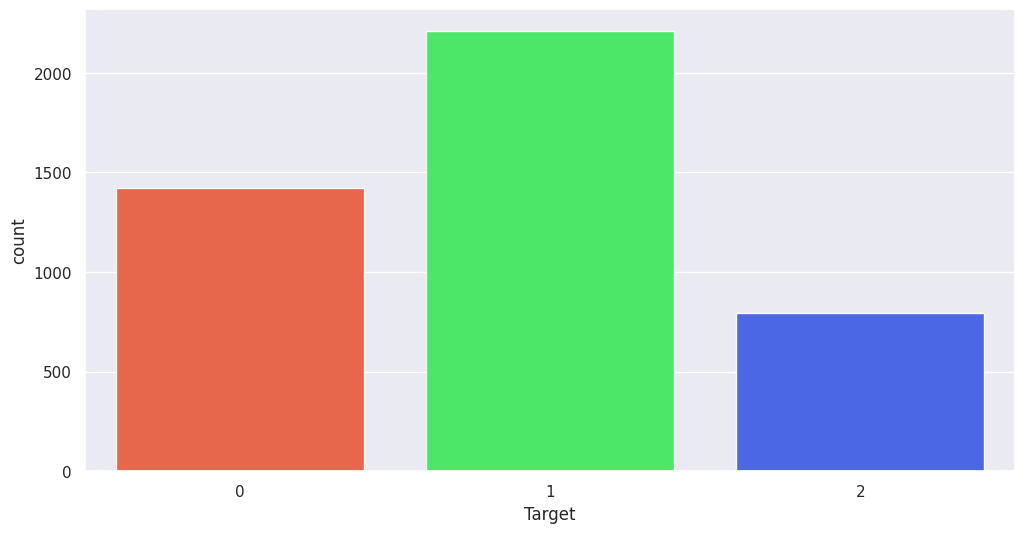

In [190]:
# Visuallizing the total number of students dropout(0), graduate(1), and enrolled(2)

sns.set(rc={'figure.figsize': (12, 6)})
sns.countplot(x=df['Target'], palette=['#FF5733', '#33FF57', '#3357FF'])
plt.show()

<Axes: xlabel='Course', ylabel='count'>

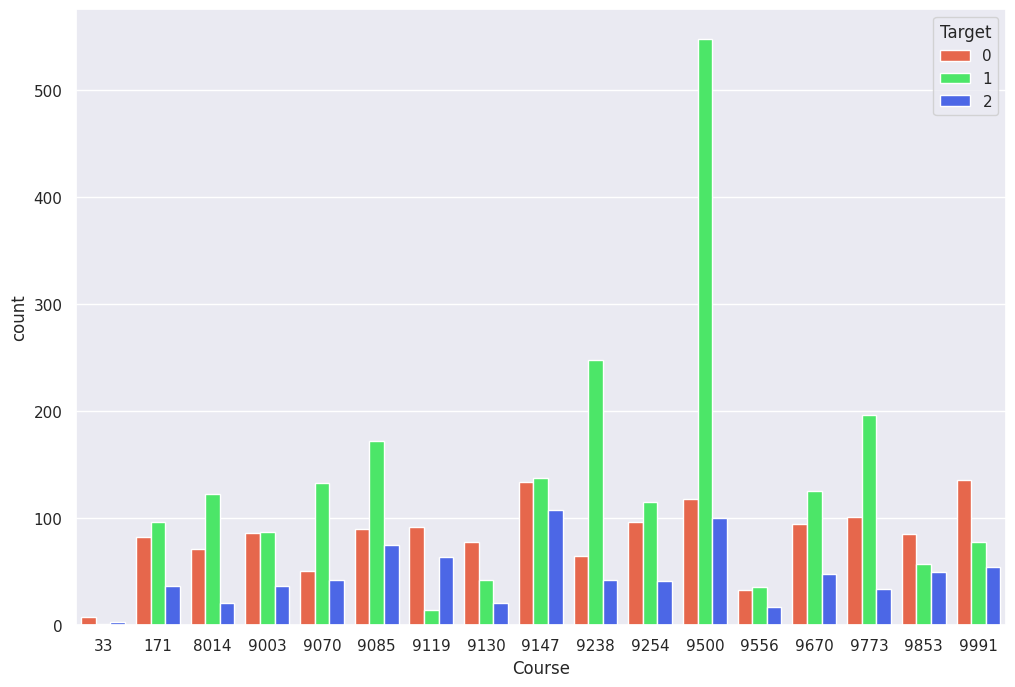

In [191]:
# Visualizing the total number of students dropout, graduate and enrolled w.r.t Course

sns.set(rc={'figure.figsize':(12, 8)})
sns.countplot(x=df['Course'], hue=df['Target'], palette=['#FF5733', '#33FF57', '#3357FF'])

<Axes: xlabel='Daytime/evening attendance\t', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


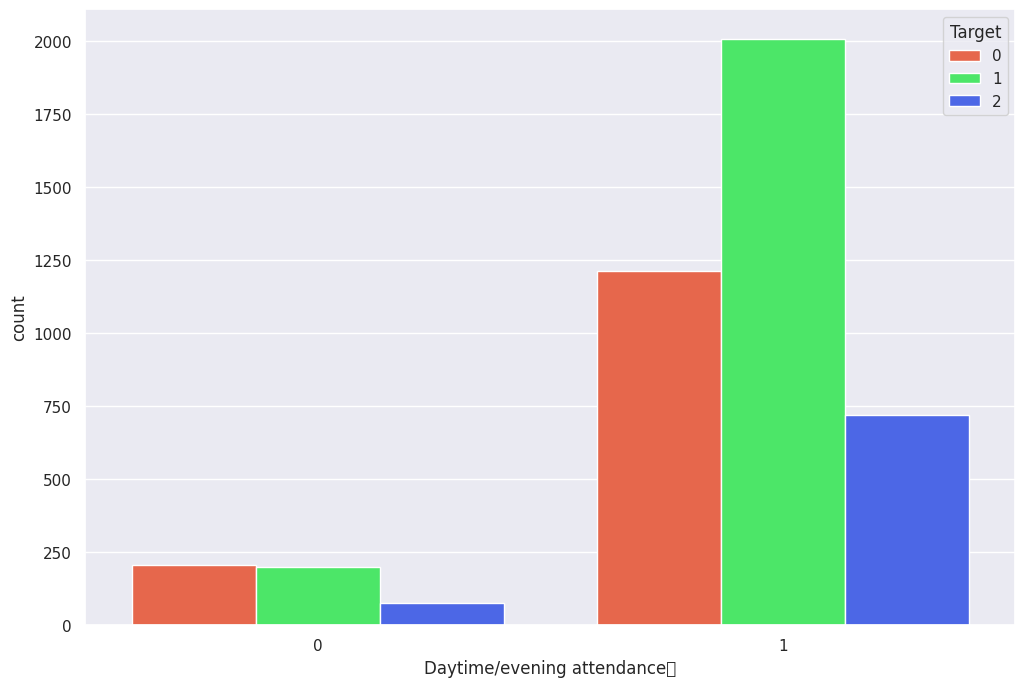

In [192]:
# Visualizing the total number of students dropout, graduate and enrolled w.r.t attendance

sns.countplot(x=df['Daytime/evening attendance\t'], hue=df['Target'], palette=['#FF5733', '#33FF57', '#3357FF'])

<Axes: xlabel='Gender', ylabel='count'>

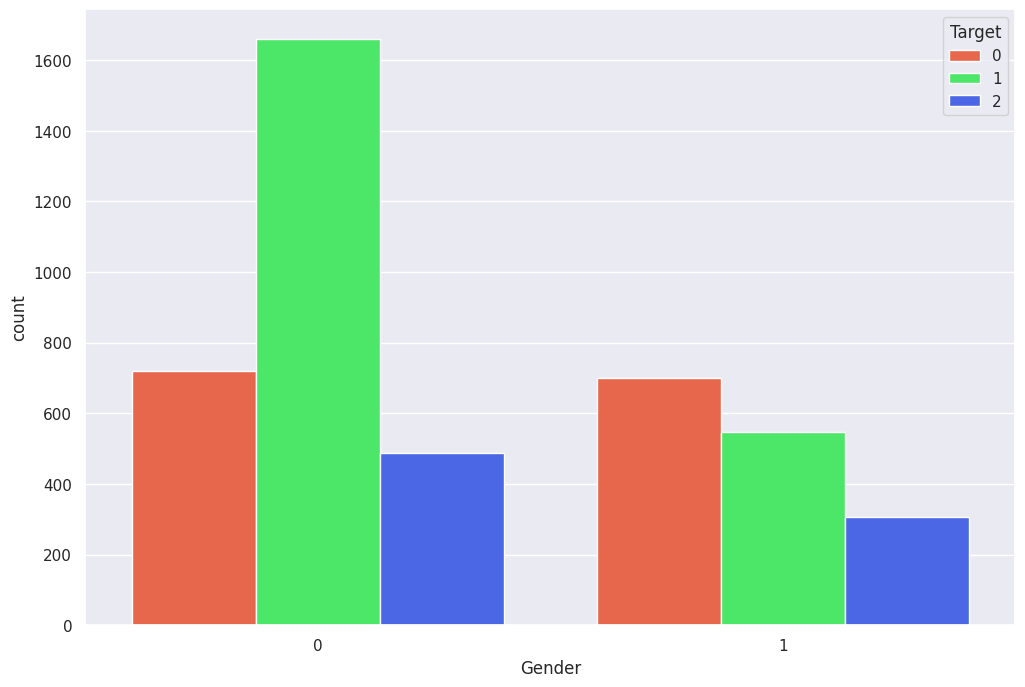

In [193]:
# Visualizing the total number of students dropout, graduate and enrolled w.r.t Gender

sns.countplot(x=df['Gender'], hue=df['Target'], palette=['#FF5733', '#33FF57', '#3357FF'])

# **3- Model Training**

In [194]:
# Defining Features and Labels

x = df.drop(columns='Target', axis=1) # features

In [195]:
x.head()

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,171,1,1,122,127,0,1,1,0,20,...,0,0,0,0,0,0,0,0,0,0
1,9254,1,1,160,142,0,0,1,0,19,...,6,6,14,0,0,6,6,6,14,0
2,9070,1,1,122,125,0,0,1,0,19,...,0,0,0,0,0,6,0,0,0,0
3,9773,1,1,122,120,0,1,0,0,20,...,8,6,13,0,0,6,10,5,12,0
4,8014,0,1,100,142,0,1,0,0,45,...,9,5,12,0,0,6,6,6,13,0


In [196]:
y = df['Target'] # label

In [197]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


### **Splitting the data into training data and testing data**

In [198]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [199]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3539, 22), (885, 22), (3539,), (885,))

In [234]:
X_train

,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
3383,9147,1,3,130,130,0,1,0,0,35,...,5,0,0,0,0,5,5,0,0,0
2840,9085,1,1,130,110,0,1,0,1,25,...,13,3,12,0,0,6,14,2,11,0
564,9070,1,6,119,123,0,1,1,0,22,...,6,6,14,0,0,6,8,6,14,0
1786,9238,1,19,133,104,0,1,1,0,42,...,0,0,0,0,0,6,0,0,0,0
3900,9500,1,1,142,137,0,1,0,1,22,...,7,6,14,0,0,7,7,6,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,9070,1,1,134,128,0,0,0,0,18,...,8,6,12,1,0,6,11,4,11,0
466,9853,1,1,133,131,0,1,0,0,20,...,9,5,14,0,4,8,8,8,13,0
3092,8014,0,1,100,113,0,1,0,1,23,...,6,6,14,0,0,6,6,6,12,0
3772,9238,1,1,127,120,0,1,0,1,19,...,6,6,14,0,0,6,7,6,13,0


In [235]:
# Print the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (3539, 22)
Training labels shape: (3539,)
Test features shape: (885, 22)
Test labels shape: (885,)


In [236]:
# Standardizing the data based on the training-test split
scaler = StandardScaler()

# Fit the scaler on the training features and transform both train and test features
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Convert back to DataFrame for easier saving and handling
X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test.columns)

# Save data into structured directories
os.makedirs('/content/data/train', exist_ok=True)
os.makedirs('/content/data/test', exist_ok=True)

# Save standardized train data
X_train_standardized.to_csv('/content/data/train/X_train_standardized.csv', index=False)
y_train.to_csv('/content/data/train/y_train.csv', index=False)

# Save standardized test data
X_test_standardized.to_csv('/content/data/test/X_test_standardized.csv', index=False)
y_test.to_csv('/content/data/test/y_test.csv', index=False)

# Download the saved files
print("Downloading train files...")
files.download('/content/data/train/X_train_standardized.csv')
files.download('/content/data/train/y_train.csv')

print("Downloading test files...")
files.download('/content/data/test/X_test_standardized.csv')
files.download('/content/data/test/y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
X_train.shape

(3539, 22)

In [202]:
X_train_standardized.shape

(3539, 22)

In [203]:
y_train.shape

(3539,)

In [204]:
# Define the model
model = models.Sequential()

# Input layer (you may need to adjust the input shape according to your dataset)
model.add(layers.InputLayer(input_shape=(22,)))

# First hidden layer with L2 regularization, batch normalization, and dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Second hidden layer with L2 regularization, batch normalization, and dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Third hidden layer with L2 regularization, batch normalization, and dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output layer (adjust the units and activation based on your task, e.g., softmax for classification)
model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 36,865 (144.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [205]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # For multi-class classification; adjust as needed
              metrics=['accuracy'])

In [206]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor (e.g., 'val_loss', 'val_accuracy')
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model weights from the epoch with the best value of the monitored metric

In [207]:
# Define a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                                 factor=0.2,          # Factor by which the learning rate will be reduced
                                 patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
                                 min_lr=1e-6)         # Minimum learning rate

In [213]:
history = model.fit(X_train, y_train,
                    epochs=80,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5966 - loss: 0.2354 - val_accuracy: 0.6992 - val_loss: 0.2354 - learning_rate: 4.0000e-05
Epoch 2/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5888 - loss: 0.2354 - val_accuracy: 0.6822 - val_loss: 0.2353 - learning_rate: 4.0000e-05
Epoch 3/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5863 - loss: 0.2353 - val_accuracy: 0.6907 - val_loss: 0.2353 - learning_rate: 4.0000e-05
Epoch 4/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6090 - loss: 0.2352 - val_accuracy: 0.6822 - val_loss: 0.2352 - learning_rate: 4.0000e-05
Epoch 5/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6094 - loss: 0.2352 - val_accuracy: 0.6780 - val_loss: 0.2352 - learning_rate: 4.0000e-05
Epoch 6/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5785 - loss: 0.2351 - val_accuracy: 0.6935 - val_loss: 0.2351 - learning_rate: 4.0000e-05
Epoch 7/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5916 - loss:

In [214]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6694 - loss: 0.2316 
Test Loss: 0.2315826714038849
Test Accuracy: 0.6734463572502136


In [215]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [284]:
# Evaluate metrics with zero_division to handle undefined cases
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Model Evaluation Metrics")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Model Evaluation Metrics
Precision: 0.7394
Recall: 0.7537
F1 Score: 0.7400
Accuracy: 0.7537


In [238]:
# build the model to be able to fully understand the data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.values.ravel())

# make predictions
y_pred = model.predict(X_test)

In [239]:
# get the score of the model
accuracy_score(y_test, y_pred)

0.7536723163841808

In [276]:
# make a confusion matrix of the model
import matplotlib.pyplot as plt
import seaborn as sns


#Calculate additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print the calculated metrics
print(f"Model Evaluation Metrics:")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and print the classification/Target report (per-class metrics)
print("\nTarget Report:")
report = classification_report(y_test, y_pred, target_names=class_labels, zero_division=0)
print(report)

Model Evaluation Metrics:
Accuracy: 0.7537
Precision: 0.7394
Recall (Sensitivity): 0.7537
F1 Score: 0.7400

Target Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.74      0.79       316
   Graduated       0.77      0.92      0.84       418
    Enrolled       0.46      0.31      0.37       151

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



Confusion Matrix:
[[235  52  29]
 [  6 385  27]
 [ 40  64  47]]


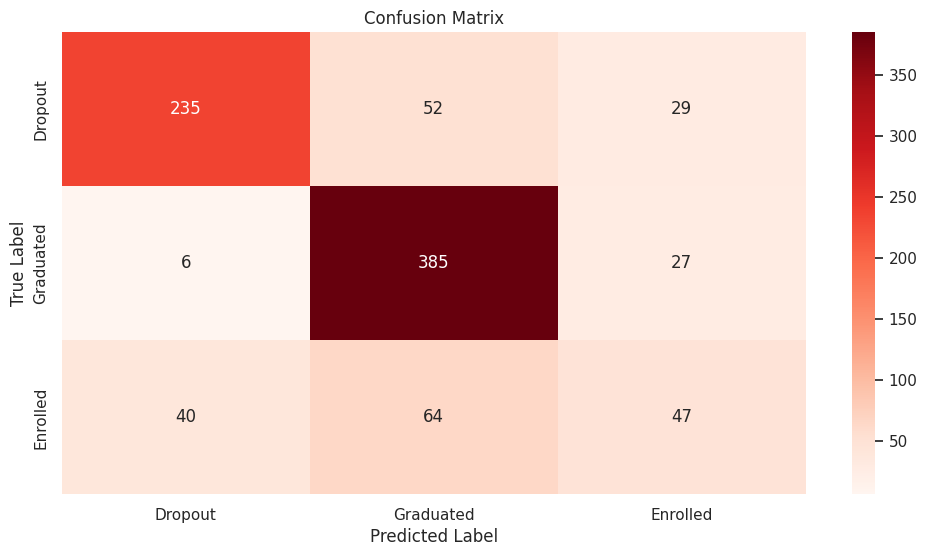

In [265]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 6))
class_labels = ['Dropout', 'Graduated', 'Enrolled']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [268]:
# Create the directory if it does not exist
os.makedirs('./model', exist_ok=True)

# Save the model in the pickle file in the Saved Models folder
pickle.dump(model, open('./model/student-predictor.pkl', 'wb'))

# Download the model file to your local machine
from google.colab import files
files.download('./model/student-predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL RETRAINING**

In [269]:
# Function to monitor data changes

def has_data_changed(old_data, new_data, threshold=0.05):

    # Perform the Kolmogorov-Smirnov test on each feature
    for column in old_data.columns:
        stat, p_value = ks_2samp(old_data[column], new_data[column])
        if p_value < threshold:
            print(f"Data has changed significantly in column: {column}")
            return True
    return False

In [271]:
# Function to retrain model
def retrain_model(X_train, y_train):
    print("Retraining the model...")
    history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])
    print("Model retrained successfully.")
    return model

# Load old and new datasets
old_data = pd.read_csv('/content/drive/My Drive/student-data.csv')
new_data = pd.read_csv('/content/drive/My Drive/student-data.csv')

# Monitor for data changes
if has_data_changed(old_data, new_data):
    # Prepare data for retraining
    X_train = new_data.drop('target', axis=1)
    y_train = new_data['target']

    # Trigger the retraining process
    retrained_model = retrain_model(X_train, y_train)
else:
    print("No significant data changes detected. Retraining not required.")

No significant data changes detected. Retraining not required.


### **Post-retraining Evaluation**

In [275]:
from sklearn.metrics import accuracy_score, log_loss

# Calculate test accuracy and loss
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_loss = log_loss(y_test, model.predict_proba(X_test))

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7537
Test Loss: 0.7532
